# Discriminibility for EEG Data

Discriminibility is an overall measure of the intra-subject consistency and the inter-subject differentiation in a test-retest type experiment with respect to a given metric $\delta$. Once $\delta$ is fixed, the discriminibility $$D = (\Psi, \Theta) = \mathbb{P}(\delta(x_{it}, x_{it'}) < \delta{x_{it}, x_{i't''}}))$$
Where $\Psi$ are the parameters of preprocessing and $\Phi$ are the parameters of the measurement technique.

In our specific case, we do not get to change $\Phi$. So we just need to find the parameters $\Psi$ which maximize the discriminibility of the EEG data.

Pseudocode of the discribminibility function:

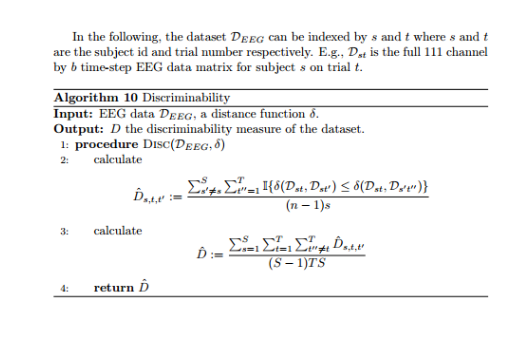

In [7]:
%matplotlib inline
import matplotlib.image as mpimage
img = mpimage.imread("Selection_006.png")
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img)

Now let's implement a shell of this in python, making the distance function modular, because we do not know what we will use yet.

The variable `eeg_data` can be considered a (C, N, T, S) `ndarray` object where:
* C = the number of channels (111)
* N = the number of timesteps (around 170 - 220k)
* T = the number of trials (depends on the task, anywhere from 1 to 10)
* S = the number of subjects (we have around 120, but we are only doing analysis on ~60 right now).

In [127]:
def partial_disc(eeg_data, s_p, t, t_p, delta):
    T = eeg_data.shape[2] # Number of trials
    S = eeg_data.shape[3] # Number of subjects
    total_true = 0
    for s in range(S):
        if not (s == s_p):
            for t_pp in range(T):
                intra = delta(eeg_data[:, :, t, s], eeg_data[:, :, t_p, s])
                inter = delta(eeg_data[:, :, t, s], eeg_data[:, :, t_pp, s_p])
                print intra, inter
                total_true += int(intra < inter)
    print total_true
    return float(total_true) / ((T-1) * S)

def disc(eeg_data, delta):
    T = eeg_data.shape[2] # Number of trials
    S = eeg_data.shape[3] # Number of subjects
    tot = 0
    for s in range(S):
        for t in range(T):
            for t_p in range(T):
                if not (t_p == t):
                    tot += partial_disc(eeg_data, s, t, t_p, delta)
    return float(tot) / ((S - 1) * T * S)

Basic testing, lets just do 2 channels, 2 timesteps, 2 trials, 2 subjects.

In [128]:
import numpy as np
one = np.zeros([2, 2, 2])
two = np.ones([2, 2, 2])
eeg_data = np.concatenate([one[...,np.newaxis], two[...,np.newaxis]], axis=3)

Now lets see the discriminibility:

In [129]:
def delta(arr1, arr2):
    if np.array_equal(arr1, arr2):
        return 0
    return 1

print disc(eeg_data, delta)

0 1
0 1
2
0 1
0 1
2
0 1
0 1
2
0 1
0 1
2
1.0
